## Import Modules

In [1]:
from matplotlib import pyplot as plt
import random
import copy
import numpy as np

## Page replacement algorithms

In [2]:
#selector can take 'fifo', 'random', 'optimal', 'lru'
def page_replacement(load, cache_size, selector):
    l, cs = load, cache_size
    cache = []
    hit = 0
    for i in range(len(l)):
        try:
            ind = cache.index(l[i])
            hit += 1
            if selector == 'lru':
                cache.pop(ind)
                cache.append(l[i])
        except:
            if len(cache) < cs:
                cache += [l[i]]
            else:
                if selector == 'fifo' or selector == 'lru':
                    cache = cache[1:] + [l[i]]
                elif selector == 'random':
                    rand = random.randint(0, len(cache)-1)
                    cache.pop(rand)
                    cache.append(l[i])
                elif selector == 'optimal':                        
                    d = dict()
                    p = 0
                    m = 1000
                    for j in cache:
                        d[j] = 0
                    for j in range(i+1, len(l)):
                        if l[j] in cache:
                            d[l[j]] += 1
                    for j in d:
                        if d[j] < m:
                            m = d[j]
                            p = j
                    cache.remove(p)
                    cache.append(l[i])
                else:
                    return -1
    return hit/10

## Creating work load array

In [3]:
a, b = list(range(10)), list(range(10,100))

for i in range(890):
    a += [random.randint(0,9)]
for j in range(10):
    b += [random.randint(10,99)]
    
load = a + b
random.shuffle(load)
cs = list(range(1,5)) + list(range(5, 1001, 5))

## Proof for 90-10 work load

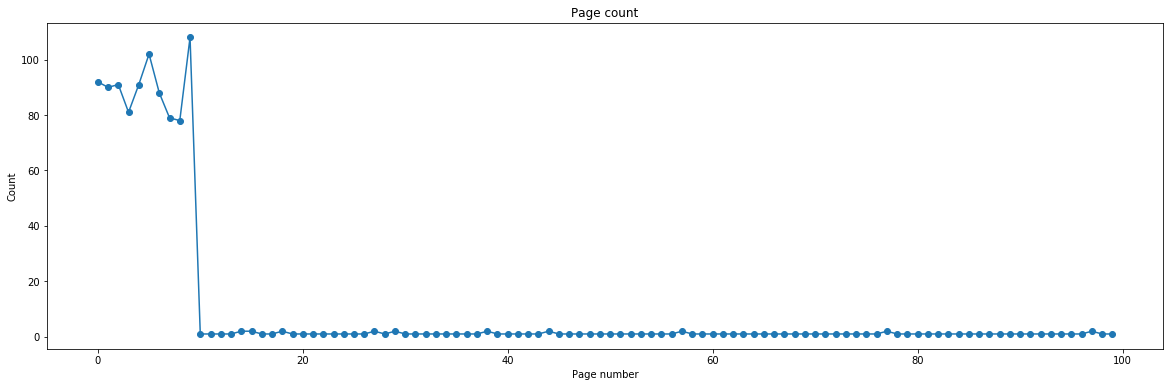

Hot = 900 pages and Non-hot = 100 pages


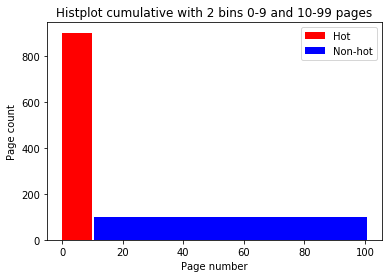

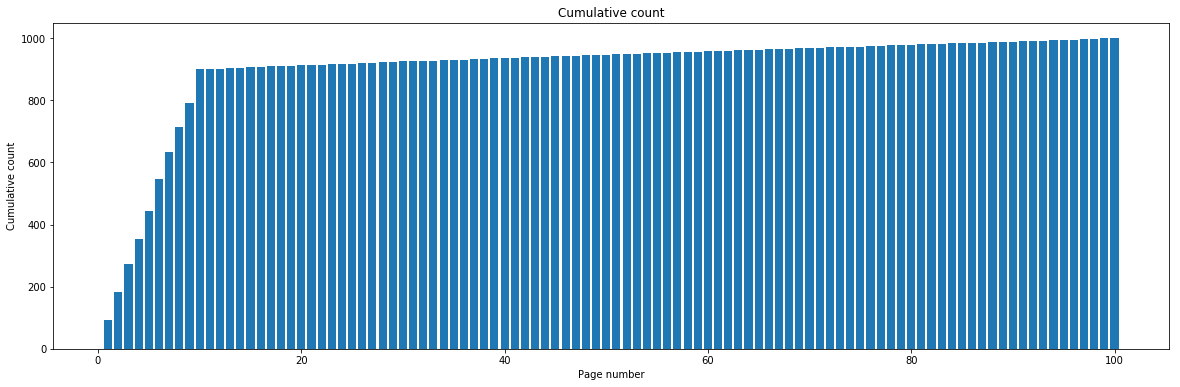

In [5]:
count = [0]*100
hot = 0
nhot = 0

for i in range(100):
    c = 0
    for j in range(1000):
        if i == load[j]:
            c += 1
            if i < 10:
                hot += 1
            else:
                nhot += 1
    count[i] = c

plt.figure(figsize=(20,6))
plt.plot(count, '-o')
plt.title('Page count')
plt.xlabel('Page number')
plt.ylabel('Count')
plt.show()
print('Hot = %d pages and Non-hot = %d pages' %(hot, nhot))
plt.hist(load, [0,10], rwidth = 0.99, color = 'red', label = 'Hot')
plt.hist(load, [10,101], rwidth = 0.99, color = 'blue', label = 'Non-hot')
plt.title('Histplot cumulative with 2 bins 0-9 and 10-99 pages')
plt.xlabel('Page number')
plt.ylabel('Page count')
plt.legend()
plt.show()

cum = [load.count(0)]
for i in range(1,100):
    cum.append(cum[i-1]+load.count(i))

plt.figure(figsize=(20,6))
plt.bar(list(range(1,101)), cum)
plt.title('Cumulative count')
plt.xlabel('Page number')
plt.ylabel('Cumulative count')
plt.show()

## Comparison plots for each policies

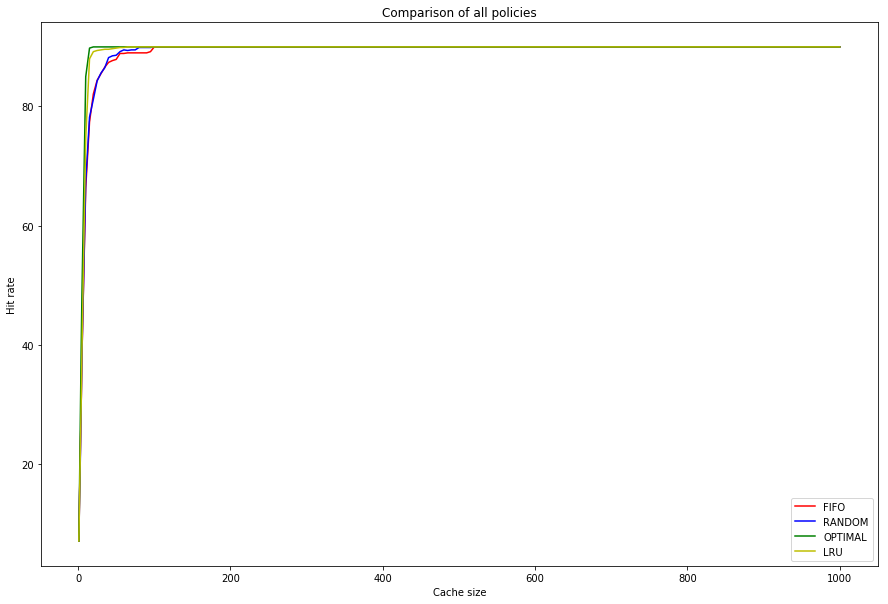

In [6]:
random.seed(10)
hits_fifo, hits_rand, hits_opt, hits_lru = [], [], [], []

for c in cs:
    hits_fifo.append(page_replacement(load, c, 'fifo'))
    hits_rand.append(page_replacement(load, c, 'random'))
    hits_opt.append(page_replacement(load, c, 'optimal'))
    hits_lru.append(page_replacement(load, c, 'lru'))

plt.figure(figsize=(15,10))
plt.plot(cs, hits_fifo, 'r', label = 'FIFO')
plt.plot(cs, hits_rand, 'b', label = 'RANDOM')
plt.plot(cs, hits_opt, 'g', label = 'OPTIMAL')
plt.plot(cs, hits_lru, 'y', label = 'LRU')
plt.xlabel('Cache size')
plt.ylabel('Hit rate')
plt.title('Comparison of all policies')
plt.legend()
plt.show()

## Mean and standard deviation for varying seeds of random policy with constant cache size

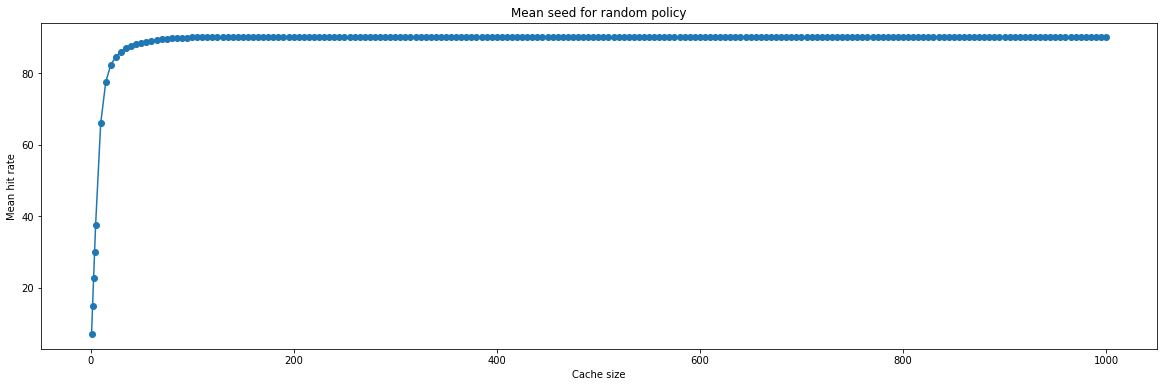

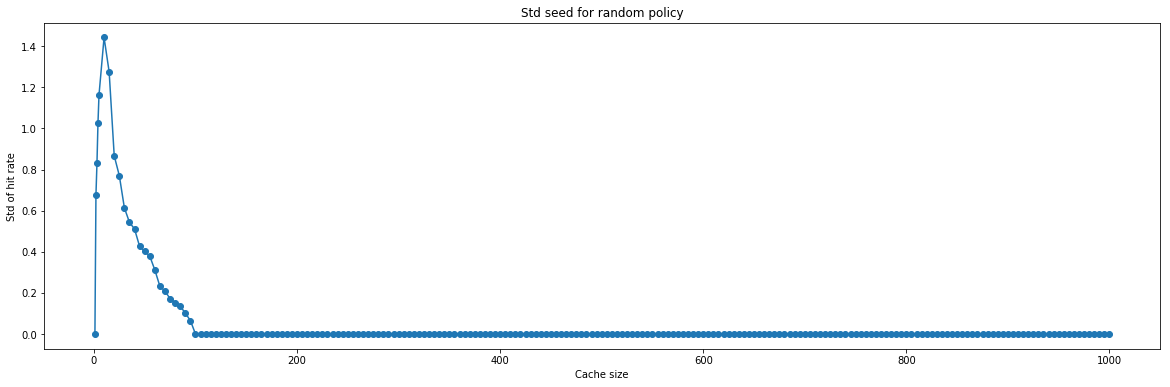

In [7]:
hits_mean, hits_std = np.zeros(len(cs)), np.zeros(len(cs))

for c in range(len(cs)): 
    s = 0
    for seed in range(100):
        random.seed(seed)
        s += page_replacement(load, cs[c], 'random')
    hits_mean[c] = s/100
    
for c in range(len(cs)): 
    s = 0
    for seed in range(100):
        random.seed(seed)
        s += (page_replacement(load, cs[c], 'random')-hits_mean[c])**2
    hits_std[c] = (s/100)**0.5
    
plt.figure(figsize=(20, 6))
plt.plot(cs, hits_mean, '-o')
plt.xlabel('Cache size')
plt.ylabel('Mean hit rate')
plt.title('Mean seed for random policy')
plt.show()
plt.figure(figsize=(20, 6))
plt.plot(cs, hits_std, '-o')
plt.xlabel('Cache size')
plt.ylabel('Std of hit rate')
plt.title('Std seed for random policy')
plt.show()

## Mean and standard deviation for varying cache size of random policy with constant seed values

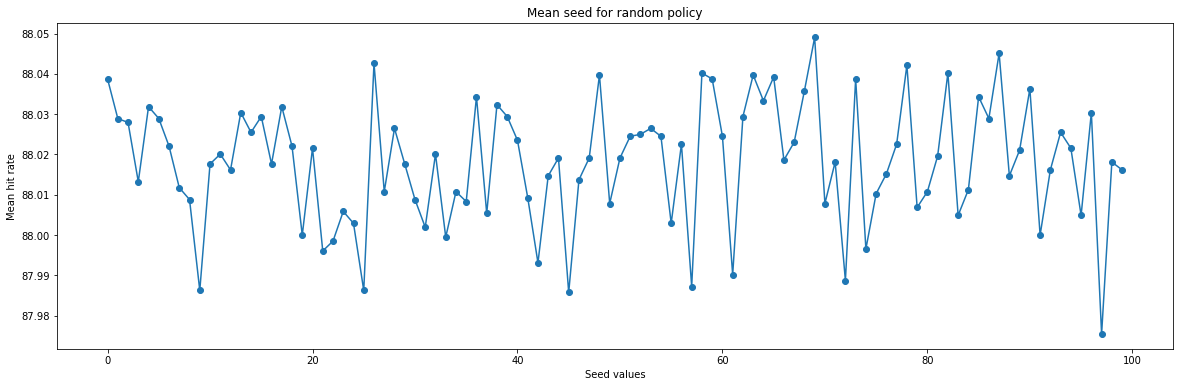

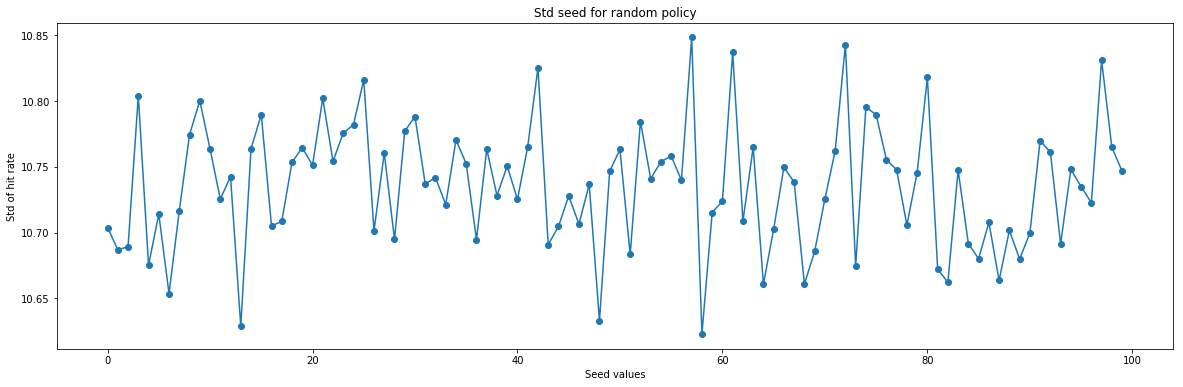

In [8]:
hits_mean, hits_std = np.zeros(100), np.zeros(100) 

for seed in range(100):
    s = 0
    random.seed(seed)
    for c in range(len(cs)): 
        s += page_replacement(load, cs[c], 'random')
    hits_mean[seed] = s/len(cs)
    
for seed in range(100):
    s = 0
    random.seed(seed)
    for c in range(len(cs)): 
        s += (page_replacement(load, cs[c], 'random')-hits_mean[seed])**2
    hits_std[seed] = (s/len(cs))**0.5
    
plt.figure(figsize=(20, 6))
plt.plot(hits_mean, '-o')
plt.xlabel('Seed values')
plt.ylabel('Mean hit rate')
plt.title('Mean seed for random policy')
plt.show()
plt.figure(figsize=(20, 6))
plt.plot(hits_std, '-o')
plt.xlabel('Seed values')
plt.ylabel('Std of hit rate')
plt.title('Std seed for random policy')
plt.show()